## Car Price Prediction Model

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("scout_car_ready.csv")

In [4]:
df.head()

,price,km,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,...,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,fuel_new_Benzine,fuel_new_Diesel,fuel_new_LPG/CNG
0,15770,56013.0,6.0,2,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14500,80000.0,7.0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,14640,83450.0,6.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,14500,73000.0,6.0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,16790,16200.0,6.0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
X = df[['km',
 'gears',
 'previous_owner',
 'inspection_new_bool',
 'cc_air conditioning',
 'cc_air suspension',
 'cc_armrest',
 'cc_automatic climate control',
 'cc_auxiliary heating',
 'cc_cruise control',
 'cc_electric starter',
 'cc_electric tailgate',
 'cc_electrical side mirrors',
 'cc_electrically adjustable seats',
 'cc_electrically heated windshield',
 'cc_heads-up display',
 'cc_heated steering wheel',
 'cc_hill holder',
 'cc_keyless central door lock',
 'cc_leather seats',
 'cc_leather steering wheel',
 'cc_light sensor',
 'cc_lumbar support',
 'cc_massage seats',
 'cc_multi-function steering wheel',
 'cc_navigation system',
 'cc_panorama roof',
 'cc_park distance control',
 'cc_parking assist system camera',
 'cc_parking assist system self-steering',
 'cc_parking assist system sensors front',
 'cc_parking assist system sensors rear',
 'cc_power windows',
 'cc_rain sensor',
 'cc_seat heating',
 'cc_seat ventilation',
 'cc_split rear seats',
 'cc_start-stop system',
 'cc_sunroof',
 'cc_tinted windows',
 'cc_wind deflector',
 'cc_windshield',
 'em_bluetooth',
 'em_cd player',
 'em_digital radio',
 'em_hands-free equipment',
 'em_mp3',
 'em_on-board computer',
 'em_radio',
 'em_sound system',
 'em_television',
 'em_usb',
 'ex_alloy wheels',
 'ex_cab or rented car',
 'ex_catalytic converter',
 'ex_handicapped enabled',
 'ex_right hand drive',
 'ex_roof rack',
 'ex_shift paddles',
 'ex_ski bag',
 'ex_sliding door',
 'ex_sport package',
 'ex_sport seats',
 'ex_sport suspension',
 'ex_touch screen',
 'ex_trailer hitch',
 'ex_tuned car',
 'ex_voice control',
 'ex_winter tyres',
 'ss_abs',
 'ss_adaptive cruise control',
 'ss_adaptive headlights',
 'ss_alarm system',
 'ss_blind spot monitor',
 'ss_central door lock',
 'ss_central door lock with remote control',
 'ss_daytime running lights',
 'ss_driver drowsiness detection',
 'ss_driver-side airbag',
 'ss_electronic stability control',
 'ss_emergency brake assistant',
 'ss_emergency system',
 'ss_fog lights',
 'ss_head airbag',
 'ss_immobilizer',
 'ss_isofix',
 'ss_led daytime running lights',
 'ss_led headlights',
 'ss_lane departure warning system',
 'ss_night view assist',
 'ss_passenger-side airbag',
 'ss_power steering',
 'ss_rear airbag',
 'ss_side airbag',
 'ss_tire pressure monitoring system',
 'ss_traction control',
 'ss_traffic sign recognition',
 'ss_xenon headlights',
 'consumption_comb',
 'displacement_cc',
 'register_age',
 'nr_doors',
 'nr_seats',
 'hp_kw',
 'make_model_Audi A1',
 'make_model_Audi A2',
 'make_model_Audi A3',
 'make_model_Opel Astra',
 'make_model_Opel Corsa',
 'make_model_Opel Insignia',
 'make_model_Renault Clio',
 'make_model_Renault Duster',
 'make_model_Renault Espace',
 'body_type_Compact',
 'body_type_Convertible',
 'body_type_Coupe',
 'body_type_Off-Road',
 'body_type_Sedans',
 'body_type_Station wagon',
 'body_type_Transporter',
 'body_type_Van',
 'vat_Price negotiable',
 'vat_VAT deductible',
 'type_Demonstration',
 "type_Employee's car",
 'type_New',
 'type_Pre-registered',
 'type_Used',
 'upholstery_Cloth',
 'upholstery_Part/Full Leather',
 'gear_type_Automatic',
 'gear_type_Manual',
 'gear_type_Semi-automatic',
 'drive_chain_4WD',
 'drive_chain_front',
 'drive_chain_rear',
 'body_color_Beige',
 'body_color_Black',
 'body_color_Blue',
 'body_color_Bronze',
 'body_color_Brown',
 'body_color_Green',
 'body_color_Grey',
 'body_color_Orange',
 'body_color_Red',
 'body_color_Silver',
 'body_color_Violet',
 'body_color_White',
 'body_color_Yellow',
 'fuel_new_Benzine',
 'fuel_new_Diesel',
 'fuel_new_LPG/CNG']]

In [10]:
y=df["price"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print(lm.intercept_)

11886.712934764599


In [17]:
lm.coef_

array([-3.95586503e-02,  5.28608098e+02, -1.87515712e+01, -2.08187720e+02,
        1.12944742e+01, -4.38812310e+02,  7.13603334e+01,  2.67953101e+02,
       -2.46915036e+02,  2.64999628e+02,  1.31768729e-09, -1.46611724e+02,
        1.77609737e+02,  2.99492793e+02,  4.48224855e+02,  2.39830955e+03,
        4.58389663e+02,  2.08735374e+02,  9.94790007e+00, -4.45455998e+02,
        1.33745685e+02,  5.82073287e+01, -3.68085290e+02,  3.73761962e+02,
        3.89930767e+01,  3.80211468e+02, -2.91235570e+02,  5.58130548e+02,
        2.01737208e+02,  1.11757714e+03,  1.90988601e+02, -4.01069850e+02,
        7.15996685e+01, -1.32012549e+02,  1.39921954e+01,  7.76608599e+02,
       -2.88226868e+02, -6.70838496e+01,  6.97893563e+02, -3.24958591e+01,
       -5.04806043e+02,  1.22643573e+02, -5.64652661e+02,  1.19455441e+01,
        8.17190620e+02,  1.97503130e+02, -1.78113972e+02, -4.96607048e+01,
        3.01980230e+02, -1.82019697e+02, -3.86216064e+02, -2.45319490e+02,
        1.00767000e+02,  

In [19]:
X.columns

Index(['km', 'gears', 'previous_owner', 'inspection_new_bool',
       'cc_air conditioning', 'cc_air suspension', 'cc_armrest',
       'cc_automatic climate control', 'cc_auxiliary heating',
       'cc_cruise control',
       ...
       'body_color_Grey', 'body_color_Orange', 'body_color_Red',
       'body_color_Silver', 'body_color_Violet', 'body_color_White',
       'body_color_Yellow', 'fuel_new_Benzine', 'fuel_new_Diesel',
       'fuel_new_LPG/CNG'],
      dtype='object', length=152)

In [21]:
cdf=pd.DataFrame(lm.coef_,X.columns, columns=["Coeff"])

In [22]:
cdf.head()

,Coeff
km,-0.039559
gears,528.608098
previous_owner,-18.751571
inspection_new_bool,-208.187720
cc_air conditioning,11.294474


In [25]:
predictions = lm.predict(X_test)

In [26]:
predictions

array([16363.07248681, 13392.518421  ,  6330.89989938, ...,
       16105.79564261, 21694.45085276,  4556.44961632])

In [27]:
y_test

7412     14990
10181    10970
6364      8450
7246     14700
12209    20280
         ...  
13203    13690
15243    19450
7468     14579
10523    17980
8604      6900
Name: price, Length: 5252, dtype: int64

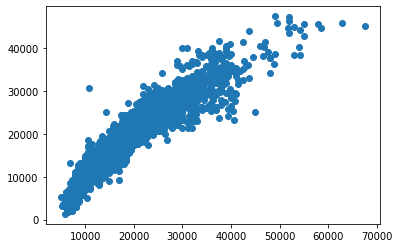

In [28]:
plt.scatter(y_test,predictions)

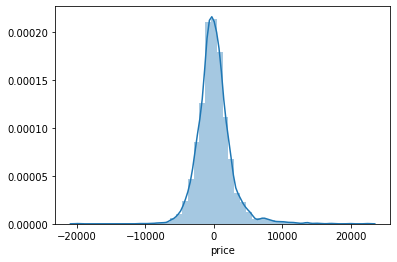

In [29]:
sns.distplot(y_test-predictions)

In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test,predictions)

1740.9626978917238

In [32]:
metrics.mean_squared_error(y_test,predictions)

6271885.491892984

In [33]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

2504.37327327477